<img src="../../images/wt4.png" align="right" width="70"/>

  #     Notebook for early bearing fault detection for WT04



## Table of contents
1. Raw signal
2. Resampled signal
3. Filtered signal with optimal bandpass based on SK
4. Demodulasation using EEMD signals
5. Selecting IMF: Correlation coefficient
6. Envelope spectral analyis
7. Frequency study

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff, feature_extraction

appended
appended
appended
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


## 1. Filtered, resampled signal 

In [3]:
vib_signal, times, op_data_intervals, peak_array = load_raw_signals.load_raw('gearbox','wt04')

File exist


In [16]:
# Reading filtered from disk
filtered_path = f'../../../../../../signal_data/resampled_filtered_2000Hz/gearbox/wt04/filtered/'

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='f'])

filtered_signals = []
resampled_time = []
filtered_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_path+'filtered_resampled_'+str(i)+'.csv')
    filtered_signals.append(acc['VibrationSignal'])
    resampled_time.append(acc['Time'])
    filtered_freqs.append(acc.shape[0] / times[i][-1])
    print(f'Reading {i} / {num_csvs} files', end='\r')
    
len(filtered_signals)

424

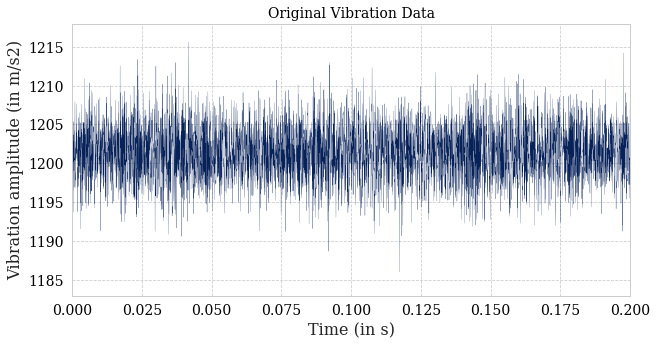

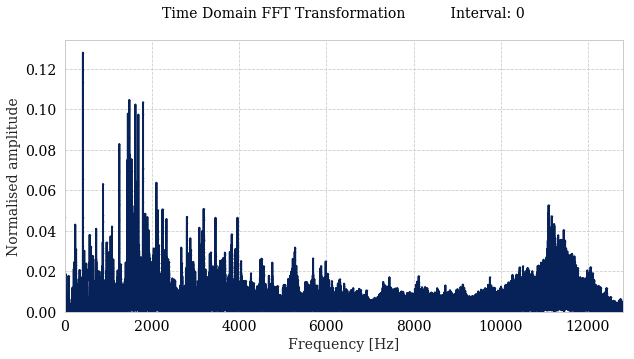

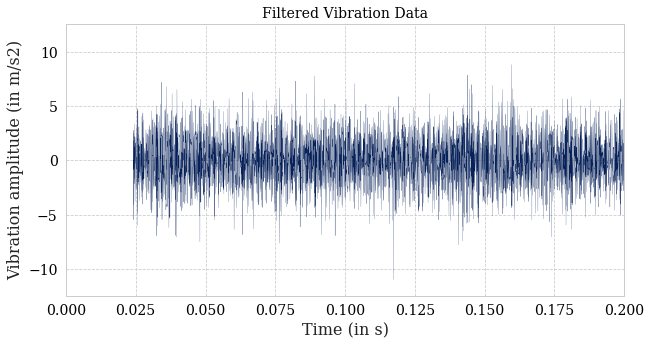

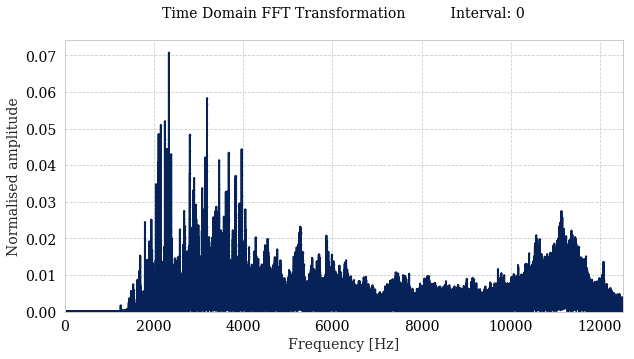

In [18]:
i = 0
plotting_methods.plot_signal(times[i], vib_signal[i], x_min=0, x_max=0.2, name='Original')
plotting_methods.plot_fft(times[i], vib_signal[i], interval_num=i)
plotting_methods.plot_signal(resampled_time[i], filtered_signals[i], x_min=0, x_max=0.2, name='Filtered')
plotting_methods.plot_fft(resampled_time[i], filtered_signals[i], interval_num=i)

### Optimal bandwidth (filtered raw)

In [19]:
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_path = f'../../../../../../signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv'
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = pd.read_csv(fc_and_bw_path)
fc_and_bw_data

,File,Frequencies,Bandwidths
0,filtered_resampled_0.csv,10376.016144,4150.406458
1,filtered_resampled_1.csv,12771.655165,567.629118
2,filtered_resampled_10.csv,12720.156556,565.340291
3,filtered_resampled_100.csv,12731.600691,286.103386
4,filtered_resampled_101.csv,12757.349996,280.381319
5,filtered_resampled_102.csv,13090.946544,70.953640
6,filtered_resampled_103.csv,12792.254609,370.789989
7,filtered_resampled_104.csv,12949.611472,69.809226
8,filtered_resampled_105.csv,12830.401727,382.997066
9,filtered_resampled_106.csv,12651.491743,460.054245


Before filter shape: (424, 9)
After filtering: (322, 9)


,Unnamed: 0,AvgPower,ActPower,WindSpeed,NacelleDirection,AvgSpeed,File,Frequencies,Bandwidths
1,1,2697.461426,2332.100098,9.100000,256.100006,1456.464986,1,12771.655165,567.629118
2,2,2606.151855,2843.500000,10.000000,240.199997,1468.503663,2,12728.167451,379.945297
3,3,2541.849854,2694.100098,10.500000,71.099998,1458.875183,3,12771.655165,567.629118
4,4,2853.304199,3293.399902,12.700000,269.399994,1460.635409,4,12823.153775,569.917946
6,6,2752.077881,3040.300049,9.700000,143.899994,1490.140485,6,12789.965782,775.149441
7,7,558.968140,-1000.000000,-10.000000,-500.000000,1485.840981,7,12833.453497,288.392213
8,8,3301.744629,3325.800049,14.700000,264.899994,1482.815723,8,12833.453497,288.392213
9,9,3034.307373,2961.899902,10.500000,301.600006,1486.301831,9,12689.257390,769.045902
10,10,2509.034180,2320.300049,9.400000,137.000000,1456.406440,10,12720.156556,565.340291
12,12,3224.229492,3260.399902,13.500000,249.500000,1479.297918,12,12830.401727,382.997066


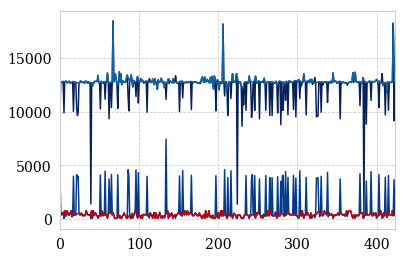

In [20]:
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[2].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)

# How the frequencies and bandwidths vary across the intervals for wt4:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()

op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)

print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
filter_concated

In [21]:
# Doing some filtering
# Removing outliers:
print(f'Shape before filtering {filter_concated.shape}')
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] < 10000)]
print(f'Shape after filtering {filter_concated.shape}')

# Filtering away the ones below 6000Hz
print(f'Shape before filtering {filter_concated.shape}')
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] > 7000 )]
print(f'Shape after filtering {filter_concated.shape}')

filter_concated

Shape before filtering (322, 9)
Shape after filtering (0, 9)
Shape before filtering (0, 9)
Shape after filtering (0, 9)


,Unnamed: 0,AvgPower,ActPower,WindSpeed,NacelleDirection,AvgSpeed,File,Frequencies,Bandwidths


In [22]:
# Finding the average optimal now.
op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)
print(f"Before filter shape: {concated.shape}")
filter_concated = filter_concated.loc[(filter_concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
len(filter_concated)


Before filter shape: (424, 9)
After filtering: (0, 9)


TypeError: Empty 'DataFrame': no numeric data to plot

In [88]:
print(int(round(mean_freq)))
print(int(round(mean_bw))) # set this to 500?

9338
4055


In [90]:
np.asarray(filter_concated).shape

(222, 9)

## 2. Resampled signal

### Reading from file

In [ ]:
# The resampled signal is filtered (Lowcut at 200 Hz (highpass))
filtered_resampled_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/filtered_resampled/'

num_csvs = len([f for f in os.listdir(filtered_resampled_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_resampled_path, f)) and f[0]=='f'])

filtered_resampled_signals = []
resample_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_resampled_path+'filtered_resampled_'+str(i)+'.csv')
    columns.append('filtered_resampled_' + str(i))
    filtered_resampled_signals.append(acc.values)
    resample_freqs.append(acc.shape[0] / times[i][-1])

In [ ]:
resample_freqs
resample_freqs = pd.DataFrame(resample_freqs,columns)

## 3. Filtered, resampled signal with optimal bandpass based on SK

# Read kurtogram data

In [ ]:
'''
fc_and_bw_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv';
frequencies_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/frequencies.csv';
file_names_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/file_name.txt';

fc_and_bw = pd.read_csv(fc_and_bw_path)
frequencies = pd.read_csv(frequencies_path)
file_names = pd.read_csv(file_names_path, header=None)

frequencies_numpy = np.asarray(frequencies).T
frequencies = pd.DataFrame(frequencies_numpy, columns= frequencies_numpy[0])
frequencies = frequencies.drop(frequencies.index[0]).reset_index(drop=True)
'''

In [ ]:
'''
kurt_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/kurtograms/';
kurt_file = f'{kurt_path}kgram_filtered_resampled_1.csv'
kurtogram = pd.read_csv(kurt_file, header=None)
plotting_methods.plot_kurtogram(kurtogram, frequencies['filtered_resampled_1.csv'])
'''

In [ ]:
'''
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv'
fc_and_bw_data = pd.read_csv(fc_and_bw_data)
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[2].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)
'''

In [ ]:
'''
# How the frequencies and bandwidths vary across the intervals for wt4:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()
'''

In [ ]:
'''
op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)
print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
filter_concated
'''

In [ ]:
'''
filter_concated = concated.loc[(concated['Frequencies'] > 18000)]
filter_concated
'''

In [ ]:
'''
# Remove higher peaks than 15000 Hz.
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] <= 15000)]
'''

In [ ]:
'''
print(mean_freq)
print(mean_bw)
optimal_bandpass = {'highcut':mean_freq-mean_bw/2,'lowcut':mean_freq+mean_bw/2}
'''

In [ ]:
'''print(f'Low: {round(int(optimal_bandpass["highcut"]))}, High: {int(round(optimal_bandpass["lowcut"]))}')'''


In [ ]:
#resample_freqs=resample_freqs.rename(columns={0:'ResampleFreq'})

In [21]:
signal = filtered_resampled_csvs[1]
signal = filtered_resampled_csvs[1]
plt.plot(signal)
signal = np.array(signal)
signal.shape

NameError: name 'filtered_resampled_csvs' is not defined

In [ ]:
'''
# Perform bandpass filtering

optimal_bandpass_signals = []
i=1

low = round(int(optimal_bandpass["highcut"]))
high = round(int(optimal_bandpass["lowcut"]))
fs_resample = resample_freqs['ResampleFreq'].iloc[i]
signal = filtered_resampled_csvs[i]
y = filters.butter_bandpass_filter(signal,low,high,fs_resample)
optimal_bandpass.append(y)

plt.plot(signal)
plt.margins(0)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
plt.title('Resampled signal with highpass filtering')
plt.plot(y)
plt.xlabel("Samples")
plt.margins(0)
plt.ylabel("Amplitude")
plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
'''

## Bandpass on raw signal with results from the spectral kurtosis

In [23]:
np.asarray(filtered_signals).shape

(424,)

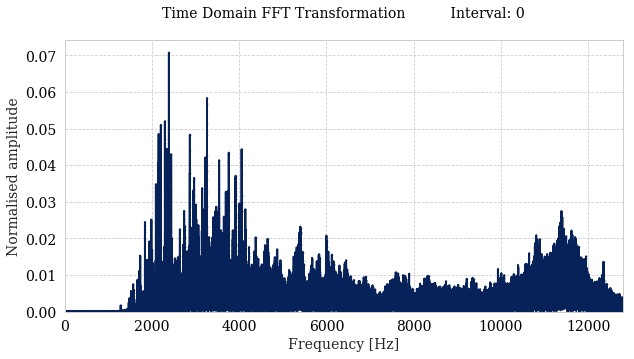

In [24]:
plotting_methods.plot_fft(times[i], filtered_signals[i], interval_num=i)


In [25]:
# Perform bandpass filtering on the raw signal!
def filter_based_on_optimal_bw(low,high,sig,time,plot=False):
    use_signal = sig
    signal = use_signal
    fs, _, _, _ =  envelope.get_sampling_freq(signal, time)

    #### Hardcoding the filters
    y = filters.butter_bandpass_filter(signal,low,high,fs)
    if plot:
        plt.plot(signal)
        plt.margins(0)
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        plt.title('Resampled signal with highpass filtering')
        plt.plot(y)
        plt.xlabel("Samples")
        plt.margins(0)
        plt.ylabel("Amplitude")
        plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
    return y

# Just loop through
optimal_bandpass_signals = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i][0:(len(filtered_signals[i])//2)]
    time = times[i][0:(len(filtered_signals[i])//2)]
    low = mean_freq - mean_bw/2
    high = mean_freq + mean_bw/2
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_signals.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i} / {signal_size} signals', end='\r')
#del filtered_signals

In [32]:
%autoreload
plotting_methods

<module 'plotting_methods' from '/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src/hybrid_analysis_process_functions/plotting_methods.py'>

ValueError: Axis limits cannot be NaN or Inf

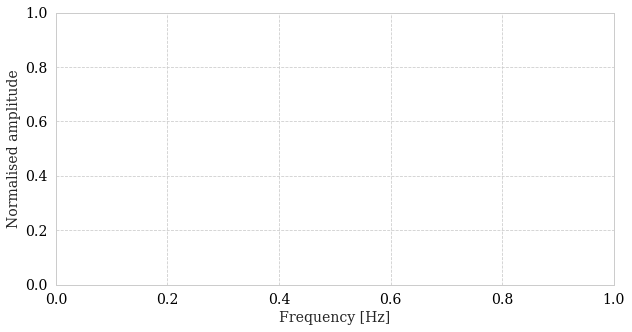

In [27]:
i = 0 
plotting_methods.plot_fft(times[i], optimal_bandpass_signals[i], interval_num=i)

## 4. Demodulasation using EEMD signals

In [94]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

In [95]:
j = 0 # The index in the optimal bandpass array. Which interval is this actually?

#all_eIMFS = []
array_size = len(optimal_bandpass_signals)

for j in range(len(optimal_bandpass_signals)):
    print(f'EEMD of {j+1} / {array_size} signals', end='\r')
    
    signal = (optimal_bandpass_signals[j]).reshape((len((optimal_bandpass_signals[j])), ))[0:20000]
    eIMFs=envelope_emd.eemd('WT04',j,'gearbox',signal,times[j][0:20000],False)
    eIMFs = np.asarray(eIMFs)
    local_path = f"../../../../../../signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{j}.csv"
    external_path = f"/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{j}.csv"
    np.savetxt(local_path, eIMFs, delimiter=",")
    #all_eIMFS.append(eIMFs)

print(f'Completed EEMD of {j+1} / {array_size} signals', end='\r')

## 5. Selecting IMF: Correlation coefficient

In [ ]:
e = np.array(eIMFs)
e.shape

In [ ]:
corr_df = correlation_coeff.get_corr_coef(eIMFs)
corr_df

## 6. Envelope spectral analysis

In [ ]:
selected_IMF_index = 1

highut_lp = 2000
rectified = abs(eIMFs[selected_IMF_index])**2
bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)

## 7. Frequency study (fault characteristics), fault development

In [ ]:
i = 0
final_signal = envelope.perform_fft(bandpass_filtered_rect_lp,time,plot=True)

plt.plot(final_signal['freq'],final_signal['fft_norm'])
plt.xlim(0,1000)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalised amplitude")

### Feature extraction from time domain

1. RMS
2. Kurtosis 
3. Skewness 
4. Peak to peak
5. Crest factor 
6. Shape factor 
7. Impulse factor 
8. Margin factor 
9. Mean 
10. STD 
11. Enery 
12. Energy entropy

In [ ]:
# Feature extraction from time domain
rms, kurt, skewness, energy_mean, signal_mean = feature_extraction.get_time_domain_features(bandpass_filtered_rect_lp,fs)